In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import random

**STUDENT NUMBER: 20121702**

# Curve Fitting

The main goal of this colab notebook is to perform correctly a Stochastic gradient descend in order to fit 3 different order polynomials to a third order polynomial.
The polynomial function is:
$$f(x;θ)= \sum_i θ_i x^i +N(μ=(0,σ))$$ where i is the length of a θ array and N the noise added

The first step will be to create a function named PolyModelWithNoise that will be the polynomial function which its loss function will be evaluated.

In [3]:
def polyModelWithNoise(x,theta,sigma):
  '''   x   -> array of x values
      theta -> polynomial parameters
      sigma -> standard deviation of the noise distribution
      noise -> disturbance (-σ,σ)

        y(x)=∑ θ(i)*x^i

  '''
  noise=np.random.normal(0,sigma,size=len(x))  #Noise follows a normal distribution, according to central limit theorem since this values are random and in this case with standard deviation σ=0.5
  y=np.zeros(len(x))  #storage
     #looping over all input x
  for i in range(len(theta)): #loopin over theta to get the desired order of the polynomial
    y+=theta[i]*x**i  #function
  return y+noise
#parameters
sigma=0.5
theta=[0,2]
#input x evenly space x over a range (1,100)
x=np.linspace(0,1,100)

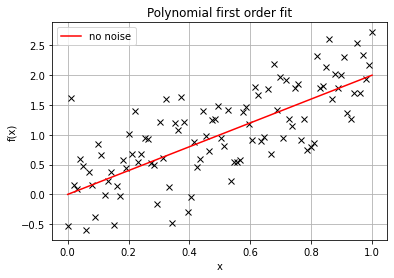

In [4]:
fig,ax=plt.subplots() #plot
ax.plot(x,polyModelWithNoise(x,theta,sigma),'x',color='k') #the parameters we want to fit our model to
ax.plot(x,polyModelWithNoise(x,theta,0),'red',label='no noise') #our initial fit
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.set_title('Polynomial first order fit')
ax.grid()
ax.legend()

As we can see the function with noise follows the trend of the function with some deviation, however there is probably a best fit to the noisy data.
We will use Stochastic gradient descent to test this and find a better fit.

Let's start by taking the gradient of $\theta_1$ and $\theta_2$, $$f(x) =∑ {\theta_i}{\left(x\right)^i}$$

We can differentiate it very easily with respect to the parameters theta
$$ \frac{\partial f}{\partial \theta_m} = {\left(x\right)^m }$$

Now let's implement this with a numpy function

This will be necessary to evaluate the chisquared and later one the minimisation to determine the model parameters that will minimise it.

In [8]:
def polyGradient(x,theta):
  '''
  Gradient of the polynomial
  wrt parameter theta.
    y'(x;θ)= x^(m)
   for m parameters of theta

  x and theta -> arrays
  '''
  
  grad=np.zeros((len(theta),len(x))) #storage
  for i,val in enumerate(x):
    for m in range(len(theta)):   #polynomial order
      grad[m,i]+=val**m
 
  return grad


Text(0.5, 1.0, 'gradient of f(x) wrt to θ')

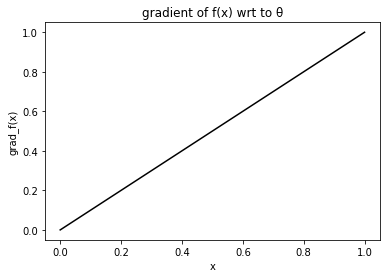

In [9]:
fig,ax=plt.subplots()  #plot gradient
ax.plot(x,polyGradient(x,theta)[1,:],color='k')
ax.set_xlabel('x')
ax.set_ylabel('grad_f(x)')
ax.set_title('gradient of f(x) wrt to θ')

Now let's implement the stochastic gradient descent algorithm.
Choosing randomly(uniform distribution) a batch size of x that will be feed to our model,then it calculated the gradient of the loss function with respect to the parameters of the model.
This is done by comparing the 'true' output to the current model output with current parameters (theta), and then updated parameters (theta) based on this deviation and the learning rate (on this rate will depend how big a change we are doing). 
This process gets repeated until it reaches the maximum minimum, the final parameters will be used as our final fit for the model.

In [17]:
def stochastic_gradient_descent(theta,theta_guess,sigma,lrate,numsteps):
  '''
  This function updates the theta parameter of the polynomial model function
  using Stochastic gradient descent.
  parameters:
  input:
    theta: "true" theta array
    sigma: standard deviation
    numsteps: number of loops
    theta_guess: initial guess of theta
  output:
    chiSq_storage: array of (fake) chisquared values for each iteration
    theta_storage: array of updated(estimated) theta values
  '''
  #storage
  chiSq_storage=np.zeros(numsteps)
  theta_storage=np.zeros((numsteps+1,len(theta_guess))) #since we start from the guess add a +1
  theta_storage[0]=theta_guess #first guess
  #looping
  for i in range(numsteps):
    x=np.random.uniform(0,1,size=10) #sample of 10 random x values from a uniform distribution between 0 and 1
    #y values with and without noise
    y_noise=polyModelWithNoise(x,theta,sigma)
    y_no_noise=polyModelWithNoise(x,theta_guess,0)
    deviation=-y_noise+y_no_noise
    chiSq_storage[i]=np.average(deviation**2)
    theta_guess-=lrate*np.average(deviation[None,:]*polyGradient(x,theta_guess),axis=1)#updating theta
    theta_storage[i+1]=theta_guess
  return chiSq_storage, theta_storage


In [18]:
theta_guess=[-1,0.5]  #theta values
numsteps=100   #number of steps
lrate=0.5   #learning rate
sigma=0.5

Text(0.5, 1.0, 'Minimisation of $\\chi^2$')

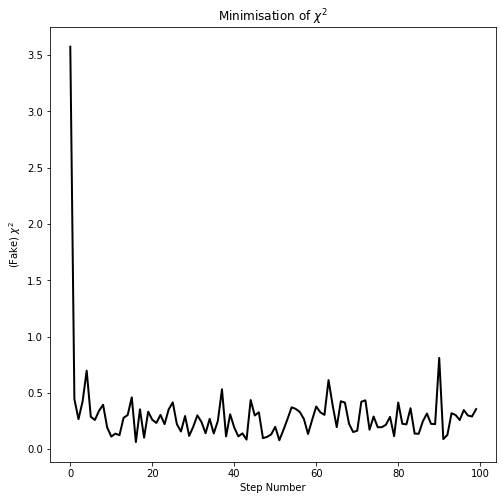

In [19]:
# First plot is going to be step number vs chisquared
fig, ax = plt.subplots(figsize=(8,8))  
count=np.arange(numsteps+1)  #The integers from 0 up to num steps+guess
ax.plot(count[:-1],stochastic_gradient_descent(theta,theta_guess,sigma,lrate,numsteps)[0],linewidth=2,color='k')
ax.set_xlabel("Step Number")
ax.set_ylabel(r"(Fake) $\chi^2$")
ax.set_title('Minimisation of $\chi^2$')

The $χ^2$ minimises in teh first 10 steps and once it reaches such a minimisation it changes slightly sort of "oscillating" this might be due to the random noise that is been added.

# Further analysis
Lets evaluate the model fit to see how it has improved

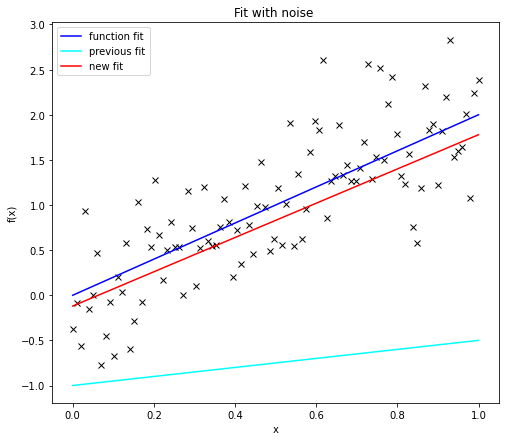

In [ ]:
fig2,ax2= plt.subplots(figsize=(8,7))#plot
ax2.plot(x,polyModelWithNoise(x,theta,sigma),'x',color='k')
ax2.plot(x,polyModelWithNoise(x,theta,0),color='blue',label='function fit')
ax2.plot(x,polyModelWithNoise(x,theta_guess,0),color='cyan',label='previous fit')
ax2.plot(x,polyModelWithNoise(x,stochastic_gradient_descent(theta,theta_guess,sigma,lrate,numsteps)[1][-1],0),color='red',label='new fit')
ax2.set_xlabel('x')
ax2.legend()
ax2.set_ylabel('f(x)')
ax2.set_title('Fit with noise ')
ax.grid()

It would be interesting to change some values for example the learning rate, stepnumber and the theta_guess to see how well we can fit it.
However I will not do that in this notebook.
As we can see the algorithm worked pretty well updating the guess value of theta until it reached a valid fit.


---




Now let's switch to testing using a third order polynomial with parameters 𝜃=[0,2,2,2], using the same noise as before.

We will fit this third order polynomial data using first only a 1st order polynomial then change it to 3rd and finally to 7th order and compare.
It is importnat to notice that what determines the order of the polynomial are the number of theta parameters used in the previous case there were two only and therefore it was a first order.

# 1st Order Polynomial:

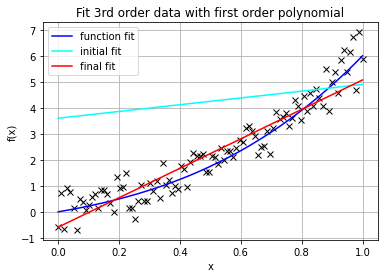

In [ ]:
theta_rd=[0,2,2,2]          #3rd order data
theta_guess_first=[3.6,1.3] #initial guess of first order
lrate=0.5                   #learning rate
first_order_fit = stochastic_gradient_descent(theta_rd,theta_guess_first,sigma,lrate,numsteps)#gradient descent
fig,ax= plt.subplots()
ax.plot(x,polyModelWithNoise(x,theta_rd,sigma),'x',color='k')
ax.plot(x, polyModelWithNoise(x, theta_rd, 0), color='blue', label='function fit')
ax.plot(x,polyModelWithNoise(x,theta_guess_first,0),color='cyan',label='initial fit')
ax.plot(x,polyModelWithNoise(x,first_order_fit[1][-1],0),color='red',label='final fit')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.legend()
ax.set_title('Fit 3rd order data with first order polynomial')
ax.grid()

The algorithm performs quite well and achieves a good fit, however due to the difference in order of polynomials it is not as good as a 3rd order fit.

# 3rd Order Polynomial

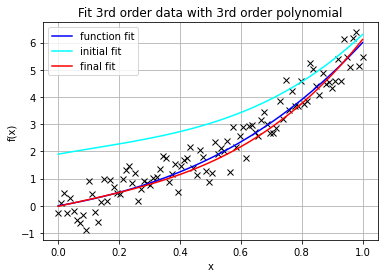

In [ ]:
theta_guess_third=[1.9,2.0,-1.3,3.7]      #our guess
third_order_fit = stochastic_gradient_descent(theta_rd,theta_guess_third,sigma,lrate,numsteps)#gradient descent
fig,ax= plt.subplots()
ax.plot(x,polyModelWithNoise(x,theta_rd,sigma),'x',color='k')
ax.plot(x,polyModelWithNoise(x,theta_rd,0),color='blue',label='function fit')
ax.plot(x,polyModelWithNoise(x,theta_guess_third,0),color='cyan',label='initial fit')
ax.plot(x,polyModelWithNoise(x,third_order_fit[1][-1],0),color='red',label='final fit')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.legend()
ax.set_title('Fit 3rd order data with 3rd order polynomial')
ax.grid()

Here we can see how this is a decent fit for a third order data and matches with the distribution of the functino with noise.

# 7th Order polynomial

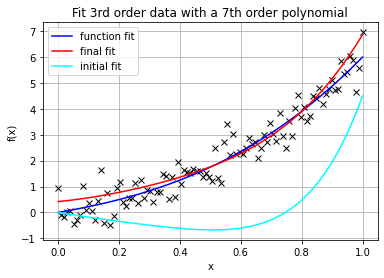

In [ ]:
theta_guess_seven=[0,-2,1.8,-2.6,0,5.7,1,0.6]     #our guess
seventh_order_fit = stochastic_gradient_descent(theta_rd,theta_guess_seven,sigma,lrate,numsteps)#gradient descent implementation

fig,ax= plt.subplots()
ax.plot(x,polyModelWithNoise(x,theta_rd,sigma),'x',color='k')
ax.plot(x,polyModelWithNoise(x,theta_rd,0),color='blue',label='function fit')
ax.plot(x,polyModelWithNoise(x,seventh_order_fit[1][-1],0),color='red',label='final fit')
ax.plot(x,polyModelWithNoise(x,theta_guess_seven,0),color='cyan',label='initial fit')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.legend()
ax.set_title('Fit 3rd order data with a 7th order polynomial')
ax.grid()

Here the fit is not bad and it is better than the first order however at large range is probable that it will not be as accurate.
To test that lets compare all the fits in a range that helps understand more the system.


---




To finally compare all the different fits lets plot them all together in the range (-0.5,1.5)

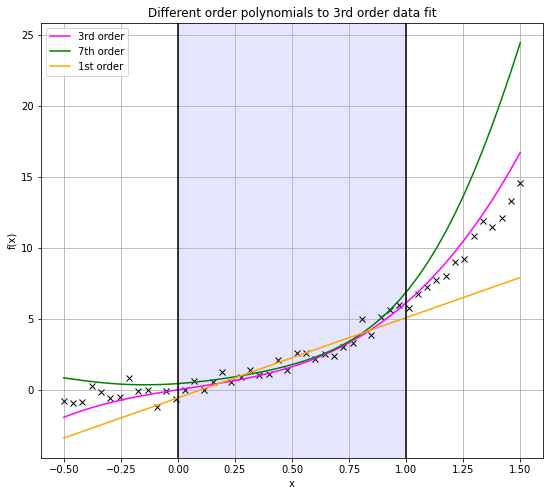

In [ ]:
fig,ax= plt.subplots(figsize=(9,8))   #final plot comparing all the different order fits
x=np.linspace(-0.5,1.5)
ax.plot(x,polyModelWithNoise(x,theta_rd,sigma),'x',color='k')
ax.plot(x,polyModelWithNoise(x,third_order_fit[1][-1],0),color='magenta',label='3rd order')
ax.plot(x,polyModelWithNoise(x,seventh_order_fit[1][-1],0),color='green',label='7th order')
ax.plot(x,polyModelWithNoise(x,first_order_fit[1][-1],0),color='orange',label='1st order')
ax.axvline(0,0,1, color='k')        #area we are asked to analyse
ax.axvline(1,0,1, color='k')
ax.axvspan(0,1,alpha=0.1,color='blue')
ax.set_xlabel('x')
ax.legend()
ax.set_ylabel('f(x)')
ax.set_title('Different order polynomials to 3rd order data fit')
ax.grid()


## Conclusion
This result is very interesting as we can see the third order polynomial is a good fit and it works very decently for all parameters of x and can be assumed that its performance will not vary much.
The first order polynomial is a decent fit in a very limited range (at the beggining) however as x increases its accuracy and performance will decrease drastically and can be assumed that for larger x values it will be worst.
The seventh order fit has a similar performance to the first order. Due to the nature of the 7th order polynomial we can theorise that it will be the one that changes the fastest and therefore willl be the worst one over 'time'.
Both fits first and seventh will be a valid fit for small values of x in the range of [0,1] but outside that range the only fit that performs well is the third order.

### Further analysis
As we have stated our conclusion and final thoughts lets add some further analysis and give some meaning to it.

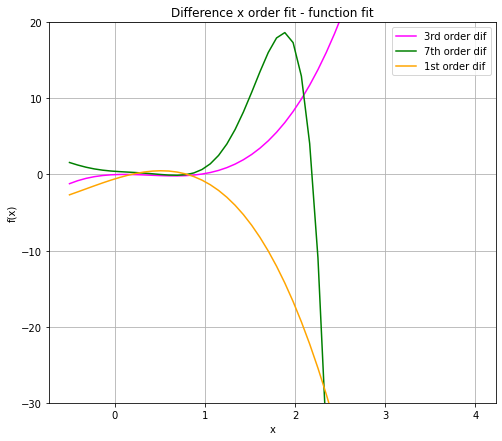

In [ ]:
fig,ax= plt.subplots(figsize=(8,7))
x=np.linspace(-0.5,4)
ax.plot(x,polyModelWithNoise(x,third_order_fit[1][-1],0)-polyModelWithNoise(x,theta_rd,0),color='magenta',label='3rd order dif')
ax.plot(x,polyModelWithNoise(x,seventh_order_fit[1][-1],0)-polyModelWithNoise(x,theta_rd,0),color='green',label='7th order dif')
ax.plot(x,polyModelWithNoise(x,first_order_fit[1][-1],0)-polyModelWithNoise(x,theta_rd,0),color='orange',label='1st order dif')
ax.set_xlabel('x')
ax.legend()
ax.set_ylim([-30,20])
ax.set_ylabel('f(x)')
ax.set_title('Difference x order fit - function fit')
ax.grid()

This just proves again what was stated earlier.
The third order fit is the only one that holds over a larger range of values and the seventh order will 'change' drastically.